
# Problem Statement



Logistic companies are currently growing rapidly. To keep the company's performance constantly increasing. Customer satisfaction needs to be taken into account

Major factor to ensure customer satisfaction is that each parcel needs to be delivered on time and there are several factors that affect on time delivery. if logistic company not able to deliver customer’s parcel on time, then the customer will lost of interest and give a negative impact to the company such as financial loss and loss of trust. This issues is the main objective for each company to solved it and improve. According to research , accuracy is one of the criteria that customers were satisfied most. (Wan Ahmad, W. N. K., Shamsuddin, A., & Tham, J. H. , 2021). 

In order to identify  whether a shipment will reach on time or not , I will build a classification model to predict whether a shipment will reach on time or not from several factor such as mode of transport and so on, so that the important result will be used by logistic department, customer services and higher management to improve.

Model performance will be assessed using accuracy. The goal is to achieve an accuracy of at least 70%

The project is appropriately scoped as it involves building a classification model using a dataset with 10,999 entries and a manageable number of features. This scope is neither too aggressive nor too easy.

Predicting whether shipments will arrive on time is valuable for logistics companies to improve their service, customer satisfaction, and operational efficiency. The insights can help in identifying factors that contribute to delays and optimizing the shipping process.

The project will be completed within 3 weeks, including data preprocessing, model development, evaluation, and reporting.


**References :** Wan Ahmad, W. N. K., Shamsuddin, A., & Tham, J. H. (2021). Customer Satisfaction of Logistics Providers’ Services. Research in Management of Technology and Business, 2(2), 220-228.


In [210]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Import metrics.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, RocCurveDisplay, roc_auc_score, recall_score, precision_score, f1_score,classification_report
from sklearn import metrics

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.svm import LinearSVC, SVC

In [211]:
# Read.
df = pd.read_csv('shipping.csv')

# Examine first five rows.
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Data Visualization

<Axes: >

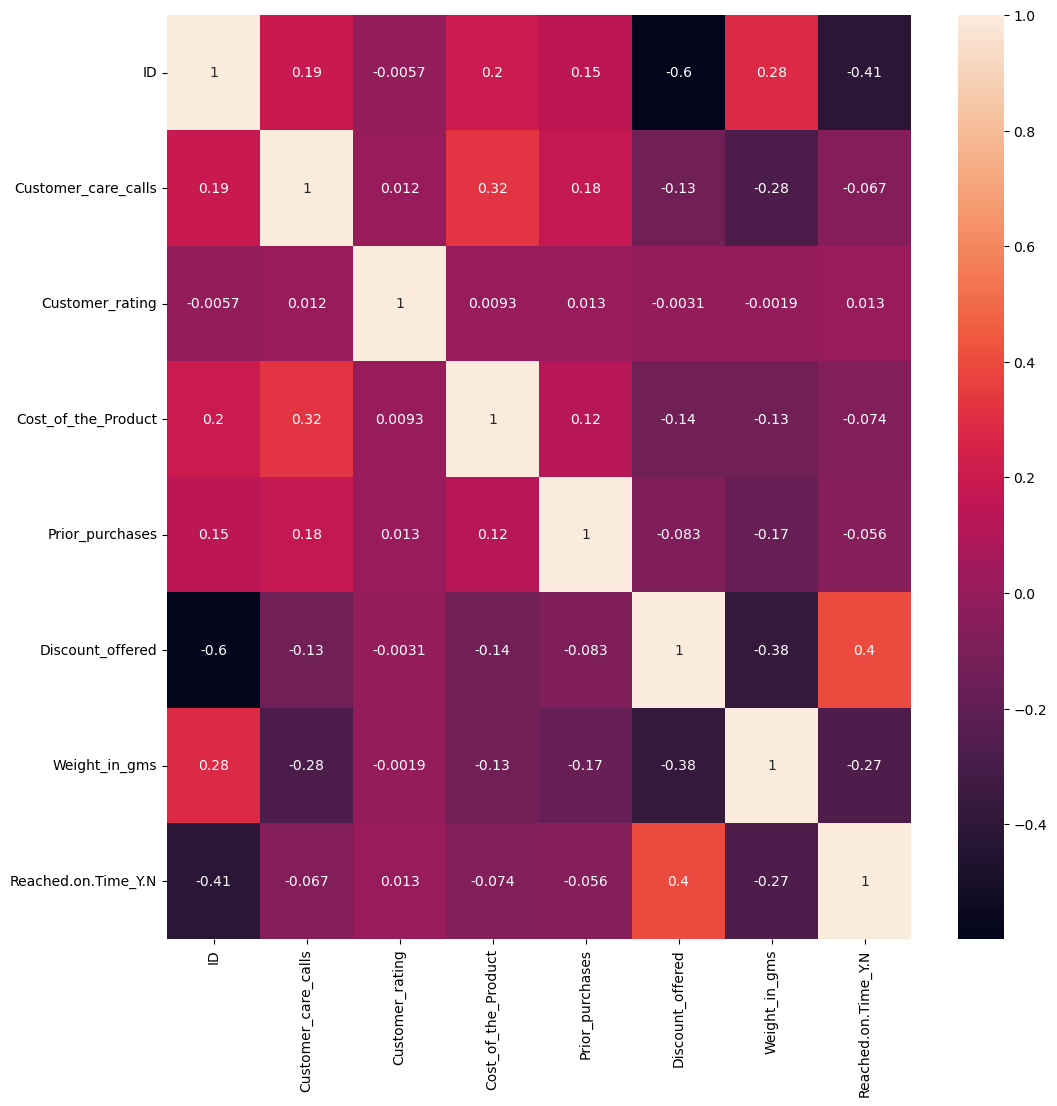

In [212]:
# Correlation Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True), annot=True)

>From the correlation matrix we can tell that weight of the product is the most affected the reached on time  delivery

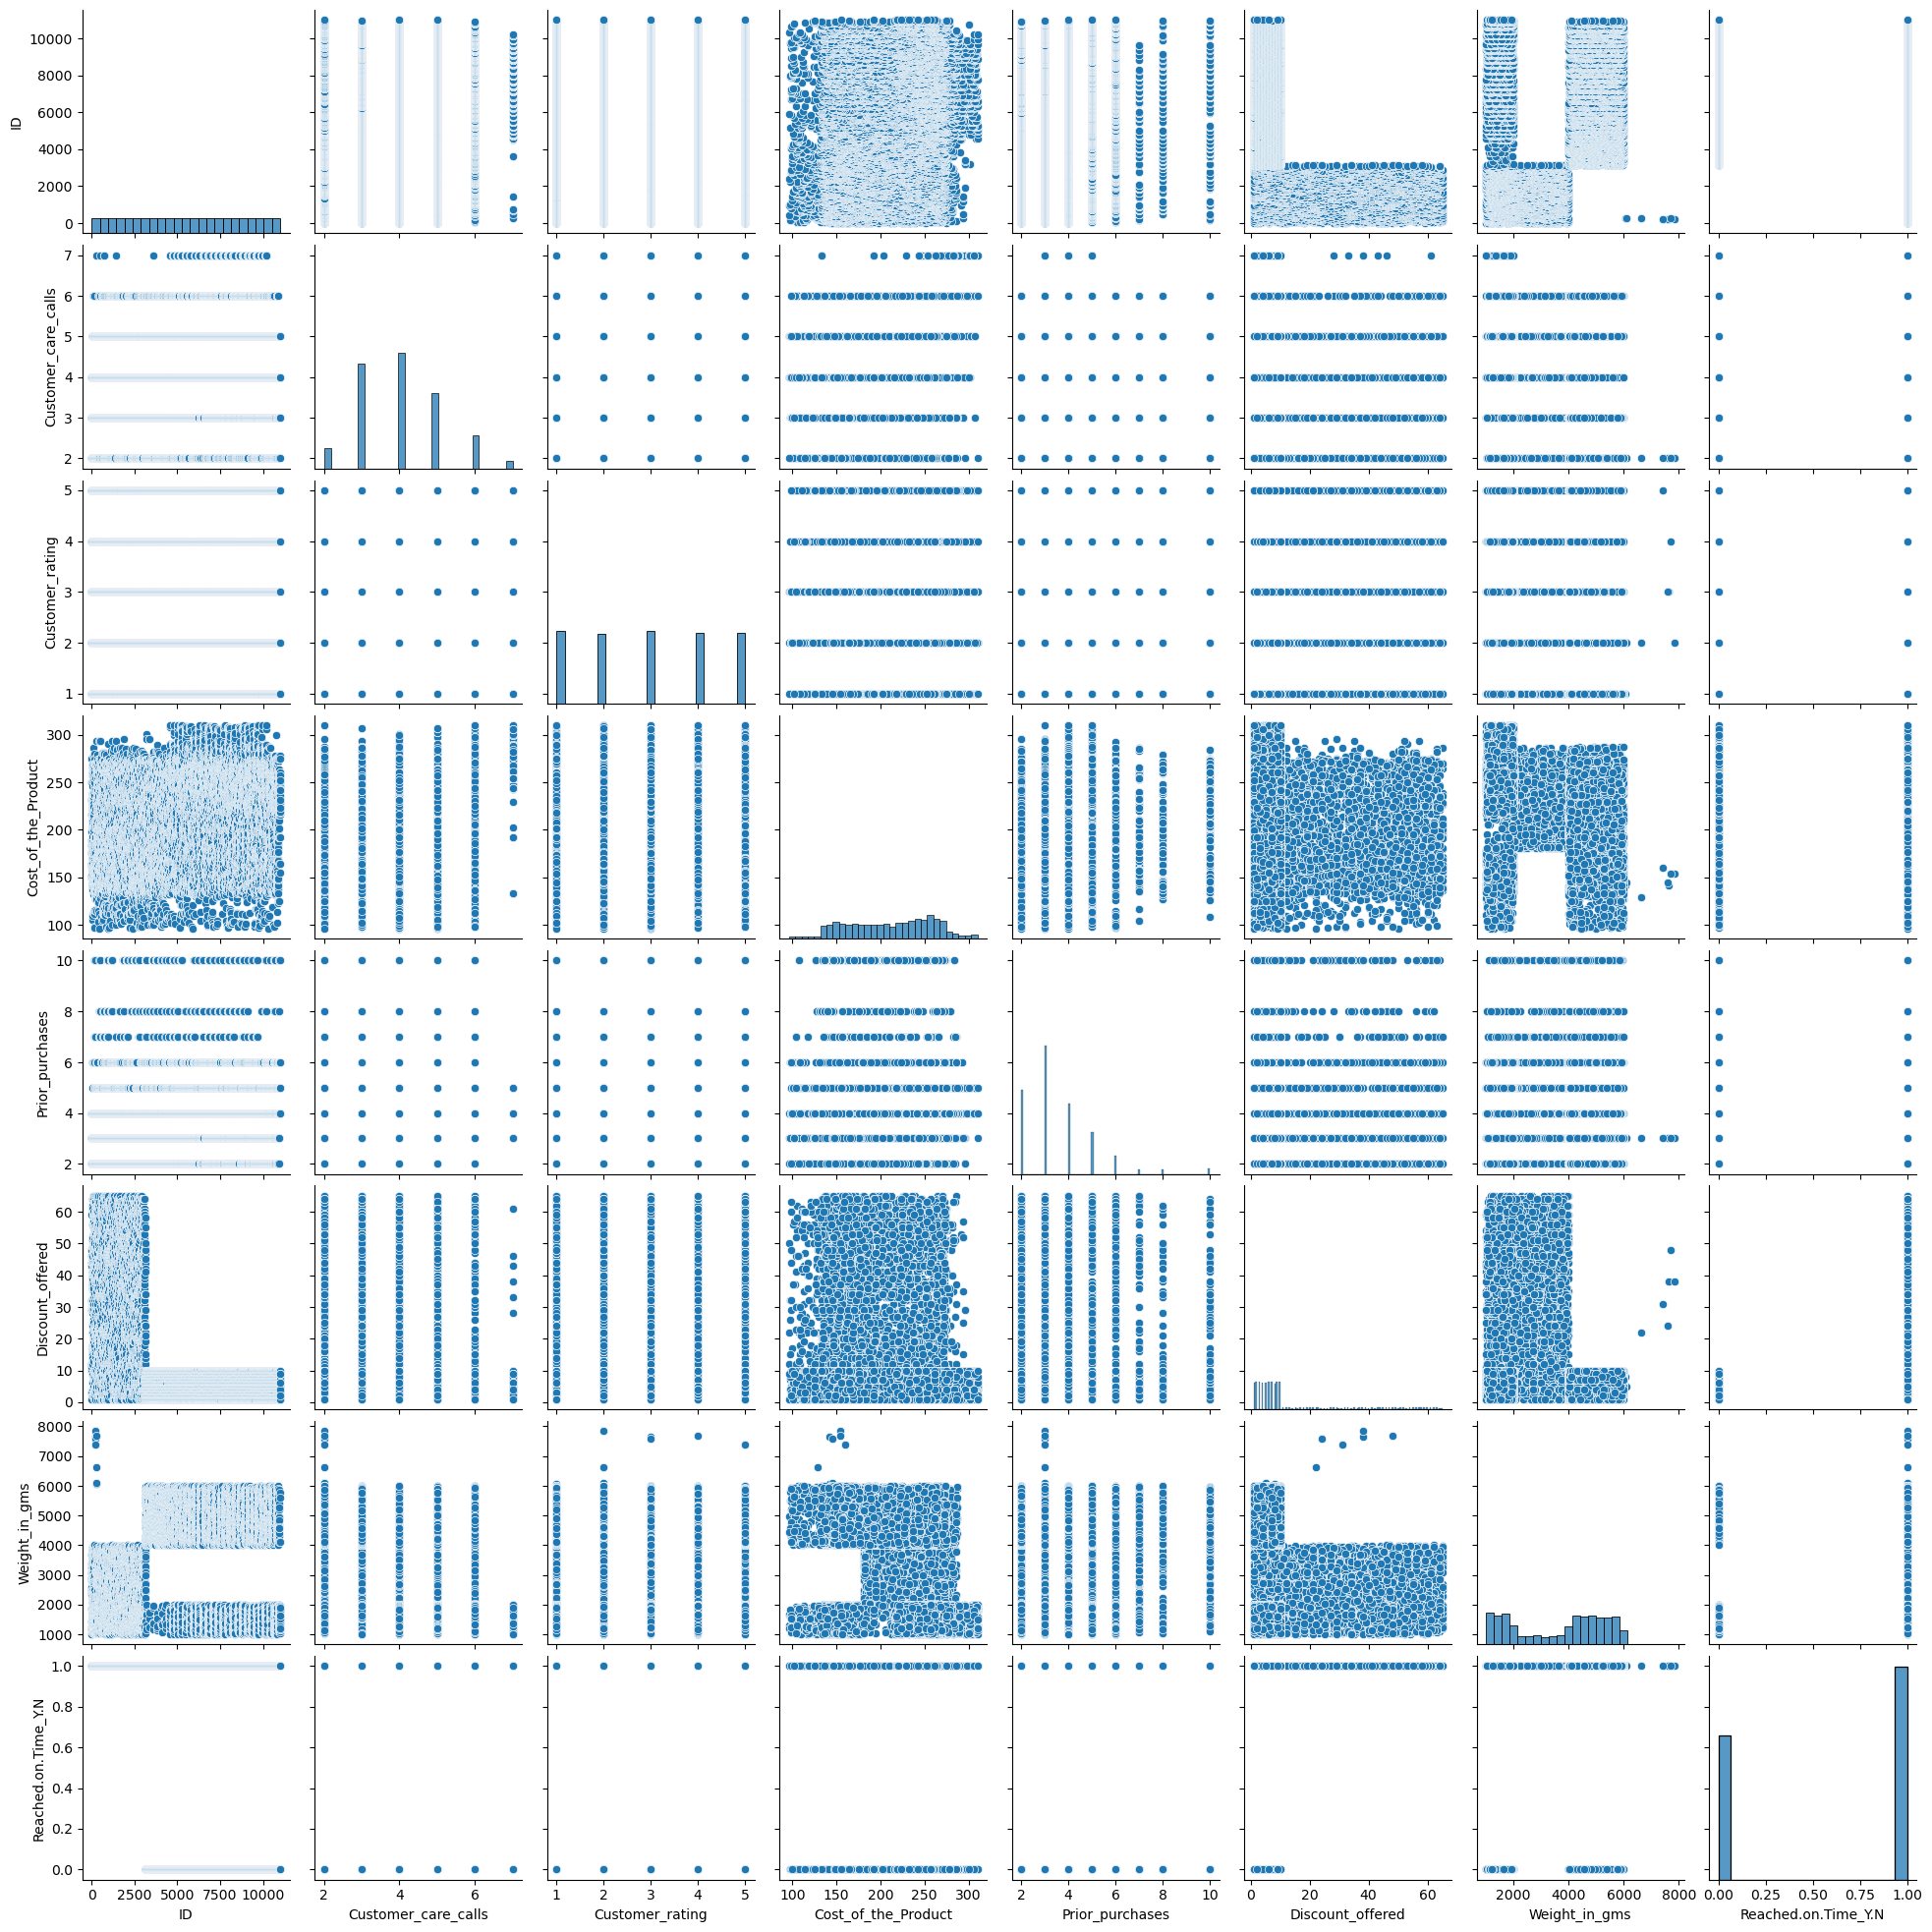

In [213]:
# Scatter plot
sns.pairplot(df)

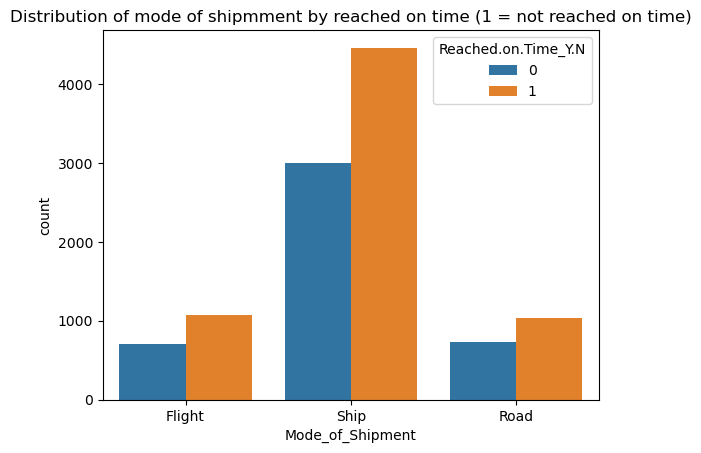

In [214]:
plt.title('Distribution of mode of shipmment by reached on time (1 = not reached on time)')
sns.countplot(x = 'Mode_of_Shipment', hue = 'Reached.on.Time_Y.N', data = df)
plt.show()

>The chart show that shipping by sea is the highest count for delivery not reached on time compare to using flight and road 

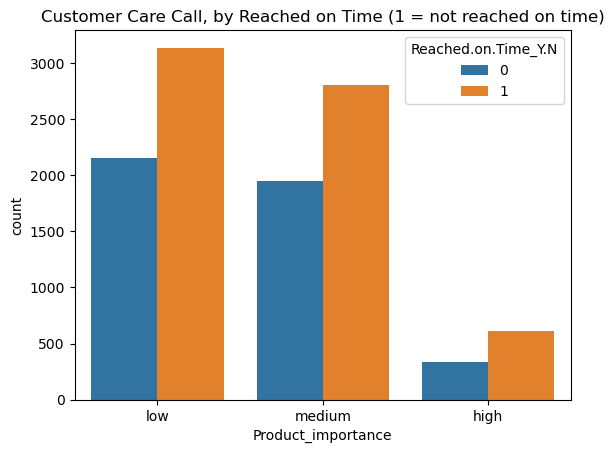

In [215]:
plt.title('Customer Care Call, by Reached on Time (1 = not reached on time)')
sns.countplot(x = 'Product_importance', hue = 'Reached.on.Time_Y.N', data = df)
plt.show()

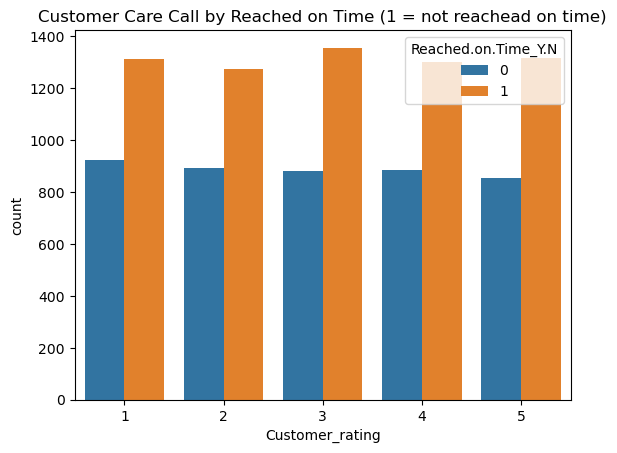

In [216]:
plt.title('Customer Care Call by Reached on Time (1 = not reachead on time)')
sns.countplot(x = 'Customer_rating', hue = 'Reached.on.Time_Y.N', data = df)
plt.show()

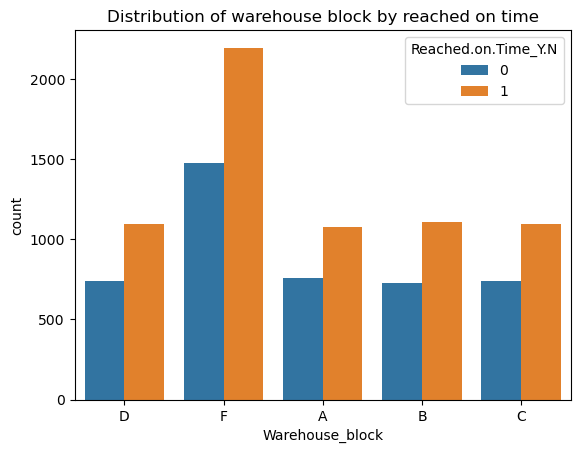

In [217]:
plt.title('Distribution of warehouse block by reached on time')
sns.countplot(data = df, x = 'Warehouse_block', hue = 'Reached.on.Time_Y.N')
plt.show()

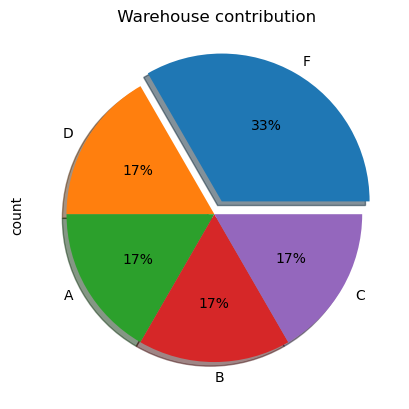

In [218]:
plt.title(' Warehouse contribution')
df['Warehouse_block'].value_counts().plot.pie(explode=(0.1,0,0,0,0),autopct="%.0f%%",shadow=True)
plt.show()

From the chart above , it shows that warehouse block F has the highest contribution for delivery count

# Exploratory Data Analysis

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [258]:
# To check for any null value
df.isnull().sum()

Warehouse_block                         0
Customer_care_calls                     0
Customer_rating                         0
Cost_of_the_Product                     0
Prior_purchases                         0
Discount_offered                        0
Weight_in_gms                           0
Reached.on.Time_Y.N                     0
Cost_of_the_Product*Discount_offered    0
Cost_of_the_Product*Weight_in_gms       0
Discount_offered*Weight_in_gms          0
Mode_of_Shipment_Road                   0
Mode_of_Shipment_Ship                   0
Product_importance_low                  0
Product_importance_medium               0
Gender_M                                0
dtype: int64

In [259]:
# To check for Unique values in each columns
for i in df.columns:
    print(i,':',df[i].nunique())

Warehouse_block : 5
Customer_care_calls : 6
Customer_rating : 5
Cost_of_the_Product : 215
Prior_purchases : 8
Discount_offered : 65
Weight_in_gms : 4034
Reached.on.Time_Y.N : 2
Cost_of_the_Product*Discount_offered : 3161
Cost_of_the_Product*Weight_in_gms : 10745
Discount_offered*Weight_in_gms : 9164
Mode_of_Shipment_Road : 2
Mode_of_Shipment_Ship : 2
Product_importance_low : 2
Product_importance_medium : 2
Gender_M : 2


In [222]:
# drop ID column
df=df.drop('ID',axis=1)
df.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1


In [223]:
# perform iteration
df['Cost_of_the_Product*Discount_offered'] = df['Cost_of_the_Product']*df['Discount_offered']

In [224]:
df['Cost_of_the_Product*Weight_in_gms'] = df['Cost_of_the_Product']*df['Weight_in_gms']

In [225]:
df['Discount_offered*Weight_in_gms'] = df['Discount_offered']*df['Weight_in_gms']

In [226]:
df.shape

(10999, 14)

In [227]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_of_the_Product*Discount_offered,Cost_of_the_Product*Weight_in_gms,Discount_offered*Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,1.099900e+04,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691,2703.287753,7.534369e+05,38632.819256
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584,3299.980491,3.651938e+05,41283.062793
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,96.000000,1.035860e+05,1004.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000,768.000000,4.369080e+05,11368.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000,1442.000000,7.544370e+05,27205.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000,2521.000000,1.029308e+06,46359.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000,18590.000000,1.713964e+06,368832.000000


In [228]:
# The baseline accuracy
df['Reached.on.Time_Y.N'].value_counts(normalize = True)
# 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64

>- Our classes are slightly unbalanced.


In [229]:
# Dummification
df=pd.get_dummies(df,columns=['Mode_of_Shipment','Product_importance','Gender'],drop_first=True, dtype=int)

In [230]:
df.head()

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_of_the_Product*Discount_offered,Cost_of_the_Product*Weight_in_gms,Discount_offered*Weight_in_gms,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,D,4,2,177,3,44,1233,1,7788,218241,54252,0,0,1,0,0
1,F,4,5,216,2,59,3088,1,12744,667008,182192,0,0,1,0,1
2,A,2,2,183,4,48,3374,1,8784,617442,161952,0,0,1,0,1
3,B,3,3,176,4,10,1177,1,1760,207152,11770,0,0,0,1,1
4,C,2,2,184,3,46,2484,1,8464,457056,114264,0,0,0,1,0


In [231]:
# LabelEncoder
le = LabelEncoder()
df['Warehouse_block']=le.fit_transform(df['Warehouse_block'])

In [232]:
df.head()

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_of_the_Product*Discount_offered,Cost_of_the_Product*Weight_in_gms,Discount_offered*Weight_in_gms,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,3,4,2,177,3,44,1233,1,7788,218241,54252,0,0,1,0,0
1,4,4,5,216,2,59,3088,1,12744,667008,182192,0,0,1,0,1
2,0,2,2,183,4,48,3374,1,8784,617442,161952,0,0,1,0,1
3,1,3,3,176,4,10,1177,1,1760,207152,11770,0,0,0,1,1
4,2,2,2,184,3,46,2484,1,8464,457056,114264,0,0,0,1,0


# Data Processing

In [260]:
# Define X and y variables
X=df.drop(['Reached.on.Time_Y.N'],axis=1)
y=df['Reached.on.Time_Y.N']

In [234]:
# Split our data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42
                                                   ) 

In [235]:
# Define the parameter grids for each model

param_grid_logreg = {
    'logreg__C':[10],
    'logreg__penalty': ['l1'],
    'logreg__solver': ['liblinear']
}

param_grid_knn = {
    'knn__n_neighbors':range(1, 51, 10),
    'knn__metric': ['euclidean', 'manhattan']
}

param_grid_dt = {
    'dt__max_depth': [5, 10, 20],
#     'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__criterion': ['gini', 'entropy']
}

param_grid_svm = {
    'svc__C': [0.1, 1, 10, 100]
}

param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
#     'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1]
}

In [236]:
# Define pipelines for each model
pipeline_logreg = Pipeline([('ss', MinMaxScaler()), ('logreg', LogisticRegression())])
pipeline_knn = Pipeline([('ss', MinMaxScaler()), ('knn', KNeighborsClassifier())])
pipeline_dt = Pipeline([('ss', MinMaxScaler()), ('dt', DecisionTreeClassifier())])
pipeline_svm = Pipeline([('ss', MinMaxScaler()), ('svc', SVC())])
pipeline_rf = Pipeline([('ss', MinMaxScaler()), ('rf', RandomForestClassifier())])


In [237]:
# # Define pipelines for each model
# pipeline_logreg = Pipeline([('ss', StandardScaler()), ('logreg', LogisticRegression())])
# pipeline_knn = Pipeline([('ss', StandardScaler()), ('knn', KNeighborsClassifier())])
# pipeline_dt = Pipeline([('ss', StandardScaler()), ('dt', DecisionTreeClassifier())])
# pipeline_svm = Pipeline([('ss', StandardScaler()), ('svc', SVC())])
# pipeline_rf = Pipeline([('ss', StandardScaler()), ('rf', RandomForestClassifier())])


In [238]:
# Perform Grid Search with Cross-Validation
grid_search_logreg = GridSearchCV(pipeline_logreg, param_grid_logreg, cv=4)
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=4)
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=4)
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=4)
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=4)

In [239]:
# Train and evaluate models
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('ss', MinMaxScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [10], 'logreg__penalty': ['l1'],
                         'logreg__solver': ['liblinear']})

In [240]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('ss', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 51, 10)})

In [241]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('ss', MinMaxScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [5, 10, 20],
                         'dt__min_samples_leaf': [1, 2, 4]})

In [242]:
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('ss', MinMaxScaler()), ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100]})

In [243]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('ss', MinMaxScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__min_samples_leaf': [1],
                         'rf__n_estimators': [100, 200]})

In [244]:
# Get the best models parameter
best_logreg = grid_search_logreg.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_dt = grid_search_dt.best_estimator_
best_svm = grid_search_svm.best_estimator_
best_rf = grid_search_rf.best_estimator_

In [245]:
# To get the best models accuracy
accuracy_logreg = accuracy_score(y_test, best_logreg.predict(X_test))
accuracy_knn = accuracy_score(y_test, best_knn.predict(X_test))
accuracy_dt = accuracy_score(y_test, best_dt.predict(X_test))
accuracy_svm = accuracy_score(y_test, best_svm.predict(X_test))
accuracy_rf = accuracy_score(y_test, best_rf.predict(X_test))

In [246]:
# Print the train and test to see the fitting
print(f'logreg X_train-y_train score: {grid_search_logreg.score(X_train, y_train)}')
print(f'logreg X_test-y_test score: {grid_search_logreg.score(X_test, y_test)}')
print()
print(f'KNN X_train-y_train score: {grid_search_knn.score(X_train, y_train)}')
print(f'KNN X_test-y_test score: {grid_search_knn.score(X_test, y_test)}')
print()
print(f'Decision Tree X_train-y_train score: {grid_search_dt.score(X_train, y_train)}')
print(f'Decision Tree X_test-y_test score: {grid_search_dt.score(X_test, y_test)}')
print()
print(f'Random Forest X_train-y_train score: {grid_search_rf.score(X_train, y_train)}')
print(f'Random Forest X_test-y_test score: {grid_search_rf.score(X_test, y_test)}')
print()
print(f'SVM X_train-y_train score: {grid_search_svm.score(X_train, y_train)}')
print(f'SVM X_test-y_test score: {grid_search_svm.score(X_test, y_test)}')
print()


logreg X_train-y_train score: 0.6488237299693147
logreg X_test-y_test score: 0.6554545454545454

KNN X_train-y_train score: 0.6948516876917832
KNN X_test-y_test score: 0.6568181818181819

Decision Tree X_train-y_train score: 0.6879190817138311
Decision Tree X_test-y_test score: 0.69

Random Forest X_train-y_train score: 0.7767928173656097
Random Forest X_test-y_test score: 0.6872727272727273

SVM X_train-y_train score: 0.664280031821798
SVM X_test-y_test score: 0.6722727272727272



In [247]:
# Print the best parameters and accuracies
print(f'logreg Best Parameters: {grid_search_logreg.best_params_}')
print(f'logreg Accuracy: {accuracy_logreg:.3f}')
print()
print(f'KNN Best Parameters: {grid_search_knn.best_params_}')
print(f'KNN Accuracy: {accuracy_knn:.3f}')
print()
print(f'Decision Tree Best Parameters: {grid_search_dt.best_params_}')
print(f'Decision Tree Accuracy: {accuracy_dt:.3f}')
print()
print(f'Random Forest Best Parameters: {grid_search_rf.best_params_}')
print(f'Random Forest Accuracy: {accuracy_rf:.3f}')
print()
print(f'SVM Best Parameters: {grid_search_svm.best_params_}')
print(f'SVM Accuracy: {accuracy_svm:.3f}')
print()


logreg Best Parameters: {'logreg__C': 10, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
logreg Accuracy: 0.655

KNN Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 31}
KNN Accuracy: 0.657

Decision Tree Best Parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__min_samples_leaf': 4}
Decision Tree Accuracy: 0.690

Random Forest Best Parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__n_estimators': 100}
Random Forest Accuracy: 0.687

SVM Best Parameters: {'svc__C': 0.1}
SVM Accuracy: 0.672



# Data Evaluation

From all models, we found out Decision Tree model has the highest accuracy which is 69% almost reach predicted goal 70% accuracy 

In [248]:
# Generate predictions.
preds = grid_search_dt.predict(X_test)
preds

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [249]:
# Generate confusion matrix.
cm = confusion_matrix(y_test, # True values.
                      preds)  # Predicted values.

In [250]:
cm

array([[836,  59],
       [623, 682]], dtype=int64)

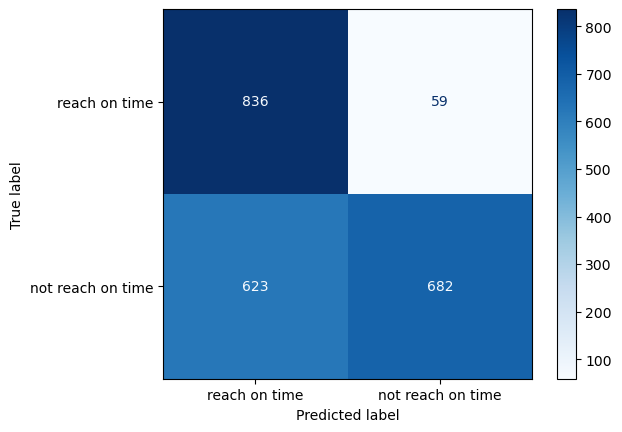

In [251]:
# plot confusion metrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['reach on time', 'not reach on time'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [252]:
# Determine TN/FP/FN/TP values.

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [253]:
# True positive
tp

682

In [254]:
# False positive
fp

59

In [255]:
# True negative
tn

836

In [256]:
# False negative
fn

623

In [257]:
# Accuracy
accuracy = (tn + tp) / (tn + fp + fn + tp)
print(f'Accuracy is {accuracy:.3f} compared to 0.700 goal')

Accuracy is 0.690 compared to 0.700 goal


# Deployment